In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Sampling the DTFT

In [2]:
def Xdtft(w):
    # Compute the DTFT
    return np.sum([_x * np.exp(-w * 1j * _n)
                   for _n, _x in enumerate(xn)])

In [3]:
# Time domain signal
xn = np.array([5, 4, 3, 2, 1])

# Fourier transform
N = 2048
W = np.arange(0, 2 * np.pi, 2 * np.pi / N)
Xn = np.array([Xdtft(_w) for _w in W])
xidft = np.around(np.real(np.fft.ifft(Xn)))

Nsamp = 10

# Time domain signal.
fig_td = figure("Time domain signal", figsize=(8, 6))
ax_orig = fig_td.add_subplot(2, 1, 1)
ax_orig.stem(np.arange(0, N, 1), xidft)
ax_orig.set_xlim(-0.2, 25.2)
ax_orig.set_xlabel("$n$", fontsize=16)
ax_orig.set_title(f"Original signal $x[n]$", fontsize=16)
ax_rcnt = fig_td.add_subplot(2, 1, 2)
plt.tight_layout()
# Fourier transform
fig_fd = figure("Fourier Representation", figsize=(8, 4))
ax_fd = fig_fd.add_subplot(1, 1, 1)


def onkeyrelease(event):
    global Nsamp
    try:
        Nsamp = int(event.key) if int(event.key) != 0 else 10
    except:
        if event.key == "up":
            Nsamp += 1
        elif event.key == "down":
            if Nsamp > 1:
                Nsamp -= 1
    updateplots()


def updateplots():
    global Nsamp
    ax_fd.clear()
    ax_fd.plot(W, np.abs(Xn), color="tab:blue", lw=1, label="DTFT")
    if Nsamp != 0:
        # Compute Nsamp-point DFT first.
        WNsamp = np.arange(0, 2 * np.pi, 2 * np.pi / Nsamp)
        XNsamp = np.array([Xdtft(_w) for _w in WNsamp])
        ax_fd.plot(WNsamp, np.abs(XNsamp), 'o', color="tab:red", label="Sampled DTFT")
        # Compute the 
    legend(loc=0)
    if Nsamp != 0:
        ax_fd.set_title(f"No. of Samples = {Nsamp}")
    ax_fd.set_xlim(-0.2, 2 * np.pi,  + 0.2)
    ax_fd.set_xlabel(f"$\Omega$", fontsize=16)
    fig_fd.canvas.draw()
    fig_fd.canvas.flush_events()
    
    # Compute the inverse DTFT
    ax_rcnt.clear()
    _xidft = np.around(np.real(np.fft.ifft(XNsamp)))
    _n = np.arange(0, 50, 1)
    __n = list(map(int, _n % Nsamp))
    ax_rcnt.stem(_n, _xidft[__n])
    ax_rcnt.set_xlim(-0.2, 25.2)
    ax_rcnt.set_xlabel("$n$", fontsize=16)
    ax_rcnt.set_title(f"Reconstructed signal $x_r[n]$", fontsize=16)
    
    fig_td.canvas.draw()
    fig_td.canvas.flush_events()
    
    plt.tight_layout()
    
updateplots()
    
# Handle events from the frequency-domain plots
cid1 = fig_fd.canvas.mpl_connect('key_release_event', onkeyrelease)

Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "<ipython-input-3-2eac52c73cb1>", line 36, in onkeyrelease
    updateplots()
  File "<ipython-input-3-2eac52c73cb1>", line 62, in updateplots
    ax_rcnt.stem(_n, _xidft[__n])
IndexError: index 18 is out of bounds for axis 0 with size 18
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "<ipython-input-3-2eac52c73cb1>", line 36, in onkeyrelease
    updateplots()
  File "<ipython-input-3-2eac52c73cb1>", line 62, in updateplots
    ax_rcnt.stem(_n, _xidft[__n])
IndexError: index 17 is out of bounds for axis 0 with size 17
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "<ipython-input-3-2eac52c73cb1>", line 36, in o

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
outdir = "output/dft/"

In [3]:
def fftfreqinx(M):
    if M % 2 != 0:
        return list(map(int, np.hstack((np.arange((M+1)/2, M, 1), np.arange(0, (M+1)/2, 1)))))
    else:
        return list(map(int, np.hstack((np.arange(M/2, M, 1), np.arange(0, M/2, 1)))))

## Negative Frequencies

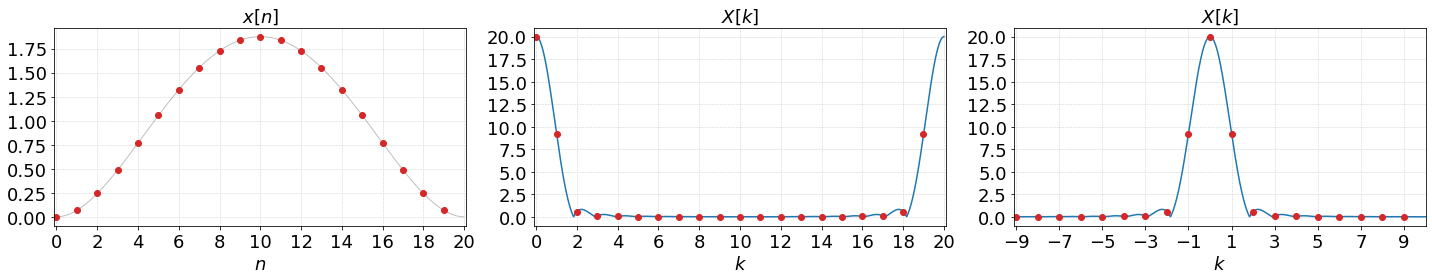

In [28]:
N = 20

t = np.arange(0, 1, 0.001)
xt = np.polyval([30, -60, 30, 0, 0], t)
n = np.arange(0, 1, 1 / N)
x = np.polyval([30, -60, 30, 0, 0], n)

# Find the DTFT of the signal.
Mdtft = 2048
wdtft = np.fft.fftfreq(Mdtft) * N
_wdtft = np.linspace(0, N, Mdtft)
Xdtft = np.fft.fft(x, Mdtft)
Inxdtft = fftfreqinx(Mdtft)
wN = np.fft.fftfreq(N) * N
_wN = np.arange(0, N)
XN = np.fft.fft(x, N)
InxN = fftfreqinx(N)

fig = figure(figsize=(20, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(N * t, xt, color="black", alpha=0.25, lw=1)
ax1.plot(np.arange(0, N), x, "o", color="tab:red")
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$", fontsize=18)
xticks(np.arange(0, N+2, 2), fontsize=18)
yticks(fontsize=18)
ax1.set_xlim(-0.1, N+0.1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(_wdtft, np.abs(Xdtft), color="tab:blue")
ax2.plot(_wN, np.abs(XN), "o", color="tab:red")
ax2.set_xlabel(r"$k$", fontsize=18)
ax2.set_title(r"$X[k]$", fontsize=18)
xticks(np.arange(0, N+2, 2), fontsize=18)
yticks(fontsize=18)
ax2.set_xlim(-0.1, N+0.1)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);

ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(wdtft[Inxdtft], np.abs(Xdtft[Inxdtft]), color="tab:blue")
ax3.plot(wN[InxN], np.abs(XN[InxN]), "o", color="tab:red")
ax3.set_xlabel(r"$k$", fontsize=18)
ax3.set_title(r"$X[k]$", fontsize=18)
xticks(np.arange(-N//2 + 1, N // 2, 2), fontsize=18)
yticks(fontsize=18)
ax3.set_xlim(-N//2 + 1 - 0.1, N // 2)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);

plt.tight_layout()

fig.savefig(f"{outdir}/dftnegfreq.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dftnegfreq.png", format="png", dpi=300);

## Zero padding time

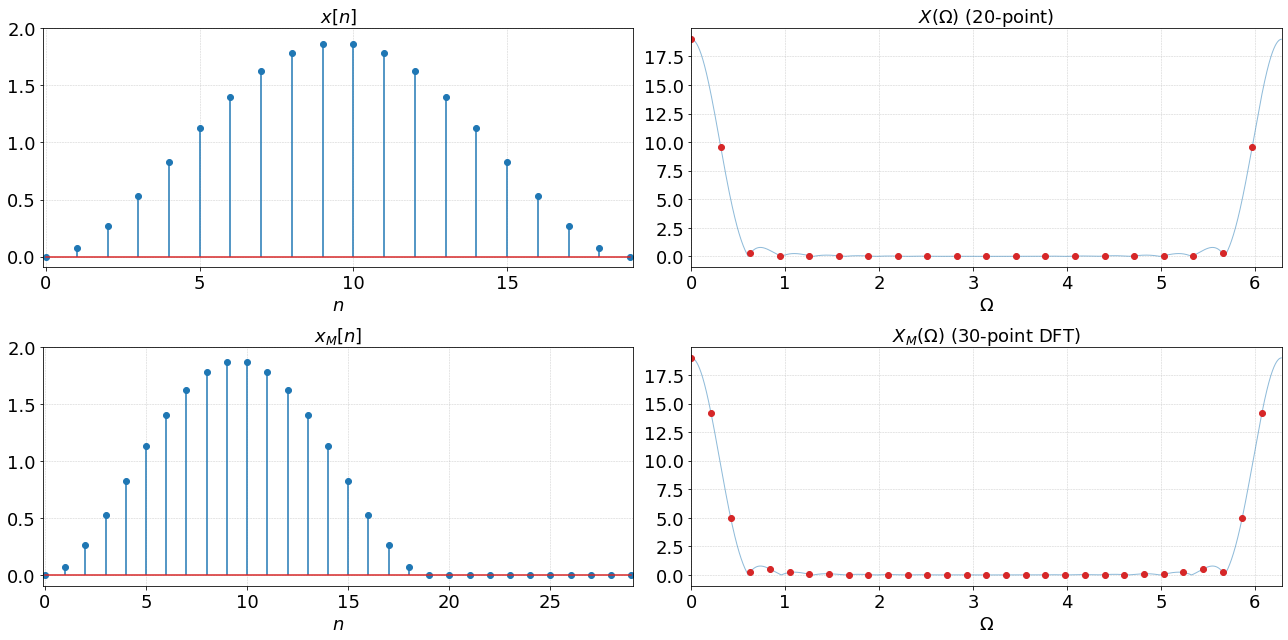

In [10]:
N = 20
n = np.linspace(0, 1, N)
x = np.polyval([30, -60, 30, 0, 0], n)

# Find the DTFT of the signal.
Mdtft = 2048
wdtft = np.arange(0, 2 * np.pi, 2 * np.pi / Mdtft)
Xdtft = np.fft.fft(x, Mdtft)
wN = np.arange(0, 2 * np.pi, 2 * np.pi / N)
XN = np.fft.fft(x, N)
M = 30
wM = np.arange(0, 2 * np.pi, 2 * np.pi / M)
XM = np.fft.fft(x, M)
xM = np.real(np.fft.ifft(XM))

fig = figure(figsize=(18, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(x)
ax1.set_xlabel("$n$", fontsize=18)
xticks(np.arange(0, 25, 5), fontsize=18)
yticks(np.arange(0, 2.5, 0.5), fontsize=18)
ax1.set_title("$x[n]$", fontsize=18)
ax1.set_xlim(-0.1, 19.1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(wdtft, np.abs(Xdtft), color="tab:blue", lw=1, alpha=0.5)
ax2.plot(wN, np.abs(XN), "o", color="tab:red", lw=1)
ax2.set_xlabel(r"$\Omega$", fontsize=18)
xticks(fontsize=18)
yticks(fontsize=18)
ax2.set_title(r"$X(\Omega)$ (20-point)", fontsize=18)
ax2.set_xlim(0, 2 * np.pi)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(wdtft, np.abs(Xdtft), color="tab:blue", lw=1, alpha=0.5)
ax4.plot(wM, np.abs(XM), "o", color="tab:red", lw=1)
ax4.set_xlabel(r"$\Omega$", fontsize=18)
xticks(fontsize=18)
yticks(fontsize=18)
ax4.set_title(r"$X_M(\Omega)$ " + f"({M}-point DFT)", fontsize=18)
ax4.set_xlim(0, 2 * np.pi)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);

ax3 = fig.add_subplot(2, 2, 3)
ax3.stem(xM)
ax3.set_xlabel("$n$", fontsize=18)
xticks(np.arange(0, M+5, 5), fontsize=18)
yticks(np.arange(0, 2.5, 0.5), fontsize=18)
ax3.set_title("$x_M[n]$", fontsize=18)
ax3.set_xlim(-0.1, M - 1 + 0.1)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);

plt.tight_layout()

fig.savefig(f"{outdir}/oversampling.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/oversampling.png", format="png", dpi=300);

## Oversmapling in time

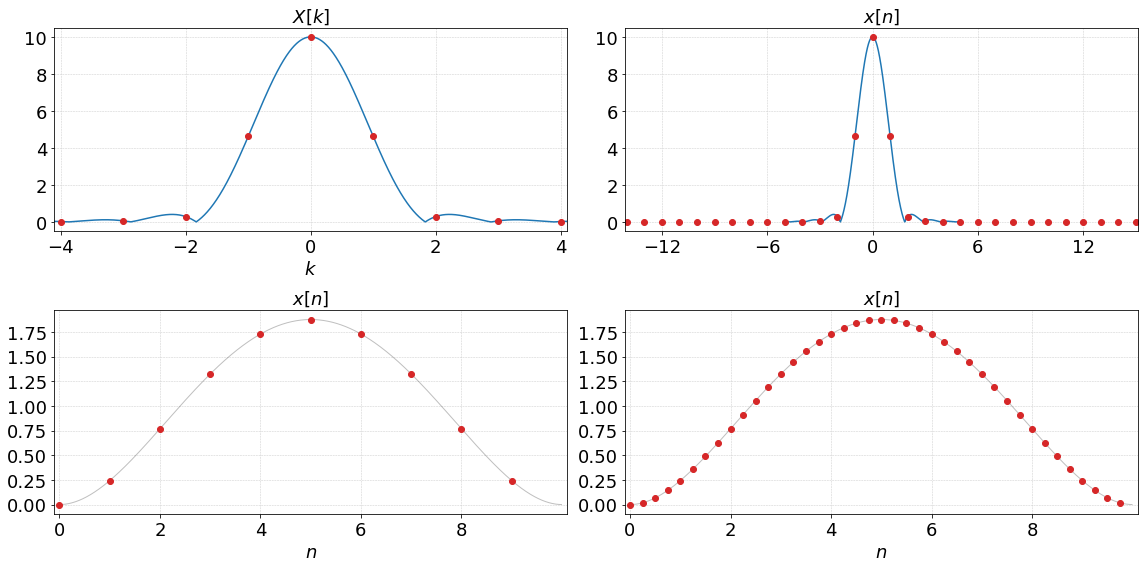

In [52]:
N = 10

t = np.arange(0, 1, 0.001)
xt = np.polyval([30, -60, 30, 0, 0], t)
n = np.arange(0, 1, 1 / N)
x = np.polyval([30, -60, 30, 0, 0], n)

# Find the DTFT of the signal.
Mdtft = 2048
wdtft = np.fft.fftfreq(Mdtft) * N
Xdtft = np.fft.fft(x, Mdtft)
Inxdtft = fftfreqinx(Mdtft)
wN = np.fft.fftfreq(N) * N
XN = np.fft.fft(x, N)
InxN = fftfreqinx(N)

M = 30
wM = np.fft.fftfreq(N + M) * (N + M)
InxM = fftfreqinx(N + M)
if N % 2 == 0:
    XM = np.hstack((XN[0:N//2], np.zeros(M), XN[N//2:]))
else:
    XM = np.hstack((XN[0:N//2], np.zeros(M), XN[N//2:]))


fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(wdtft[Inxdtft], np.abs(Xdtft[Inxdtft]), color="tab:blue")
ax1.plot(wN[InxN], np.abs(XN[InxN]), "o", color="tab:red")
ax1.set_xlabel("$k$", fontsize=18)
ax1.set_title("$X[k]$", fontsize=18)
xticks(np.arange(-N // 2 + 1, N//2, 2), fontsize=18)
yticks(fontsize=18)
ax1.set_xlim(-N//2 + 1 - 0.1, N//2 - 1 + 0.1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(N * t, xt, color="black", alpha=0.25, lw=1)
ax3.plot(np.arange(0, N), x, "o", color="tab:red")
ax3.set_xlabel("$n$", fontsize=18)
ax3.set_title("$x[n]$", fontsize=18)
xticks(np.arange(0, N, 2), fontsize=18)
yticks(fontsize=18)
ax3.set_xlim(-0.1, N + 0.1)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(wdtft[Inxdtft], np.abs(Xdtft[Inxdtft]), color="tab:blue")
ax2.plot(wM[InxM], np.abs(XM[InxM]), "o", color="tab:red")
ax2.set_title(r"$x[n]$", fontsize=18)
ax3.set_xlabel("$n$", fontsize=18)
ax3.set_title("$x[n]$", fontsize=18)
xticks(np.arange(-M, M, 6), fontsize=18)
yticks(fontsize=18)
ax2.set_xlim(-M // 2 + 1 - 0.1, M // 2 + 0.1)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);

ax4 = fig.add_subplot(2, 2, 4)
n = np.arange(0, 1, 1 / (N + M))
xidft = np.real(np.fft.ifft(XM)) * (N+M) / N
ax4.plot(N * t, xt, color="black", alpha=0.25, lw=1)
ax4.plot(n * N, xidft, "o", color="tab:red")
ax4.set_xlabel("$n$", fontsize=18)
ax4.set_title("$x[n]$", fontsize=18)
xticks(np.arange(0, N, 2), fontsize=18)
yticks(fontsize=18)
ax4.set_xlim(-0.1, N + 0.1)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);


plt.tight_layout()

fig.savefig(f"{outdir}/oversampling-time.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/oversampling-time.png", format="png", dpi=300);

## Windowing effects

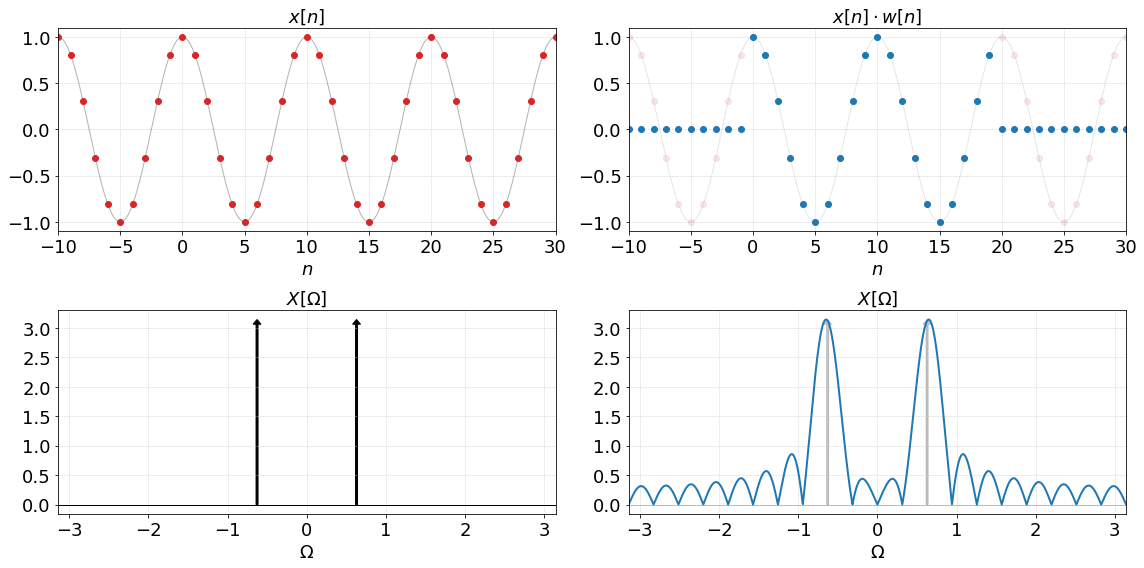

In [21]:
t = np.arange(-2, 10, 0.001)
f0 = 1
xt = np.cos(2 * np.pi * f0 * t)
Fs = 10.0
n = np.arange(-2 * Fs, int(10 * Fs), 1)
xn = np.cos(2 * np.pi * f0 * n * (1 / Fs))
N = 20
wN = (n >= 0) * (n < N)
xN = xn * wN
Ndtft = 4096
freqN = fft.fftfreq(Ndtft) * 2 * np.pi
XN = np.fft.fft(xN, Ndtft)
InxN = fftfreqinx(Ndtft)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(t * Fs, xt, color="black", alpha=0.3, lw=1)
ax1.plot(n, xn, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 5, 5), fontsize=18)
yticks(np.arange(-1, 1 + 0.5, 0.5), fontsize=18);
ax1.set_xlim(-10, 30)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$", fontsize=18)

ax3 = fig.add_subplot(2, 2, 3)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
plt.arrow(2 * np.pi * f0 /Fs, -0.04, 0, np.pi, width=0.025, length_includes_head=True,
          head_starts_at_zero=True, head_width=0.1, head_length=0.08, edgecolor="k", facecolor="k")
plt.arrow(-2 * np.pi * f0 /Fs, -0.04, 0, np.pi, width=0.025, length_includes_head=True,
          head_starts_at_zero=True, head_width=0.1, head_length=0.08, edgecolor="k", facecolor="k")
ax3.axhline(0, lw=1, color="k")
ax3.set_xlim(-np.pi, np.pi)
xticks(fontsize=18)
yticks(fontsize=18);
ax3.set_xlabel("$\Omega$", fontsize=18)
ax3.set_title("$X[\Omega]$", fontsize=18)

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(t * Fs, xt, color="black", alpha=0.1, lw=1)
ax2.plot(n, xn, "o", color="tab:red", alpha=0.1)
ax2.plot(n, xN, "o", color="tab:blue")
xticks(np.arange(n[0], n[-1] + 5, 5), fontsize=18)
yticks(np.arange(-1, 1 + 0.5, 0.5), fontsize=18);
ax2.set_xlim(-10, 30)
ax2.set_xlabel("$n$", fontsize=18)
ax2.set_title(r"$x[n] \cdot w[n]$", fontsize=18)

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
plt.arrow(2 * np.pi * f0 /Fs, -0.04, 0, np.pi, width=0.025, length_includes_head=True,
          head_starts_at_zero=True, head_width=0.1, head_length=0.08, edgecolor="k", facecolor="k", alpha=0.2)
plt.arrow(-2 * np.pi * f0 /Fs, -0.04, 0, np.pi, width=0.025, length_includes_head=True,
          head_starts_at_zero=True, head_width=0.1, head_length=0.08, edgecolor="k", facecolor="k", alpha=0.2)
ax4.axhline(0, lw=1, color="k", alpha=0.2)
_XN = np.abs(XN) / np.max(np.abs(XN))
ax4.plot(freqN[InxN], np.pi * _XN[InxN], color="tab:blue", lw=2)
ax4.set_xlim(-np.pi, np.pi)
xticks(fontsize=18)
yticks(fontsize=18);
ax4.set_xlabel("$\Omega$", fontsize=18)
ax4.set_title("$X[\Omega]$", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-leakage.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-leakage.png", format="png", dpi=300);

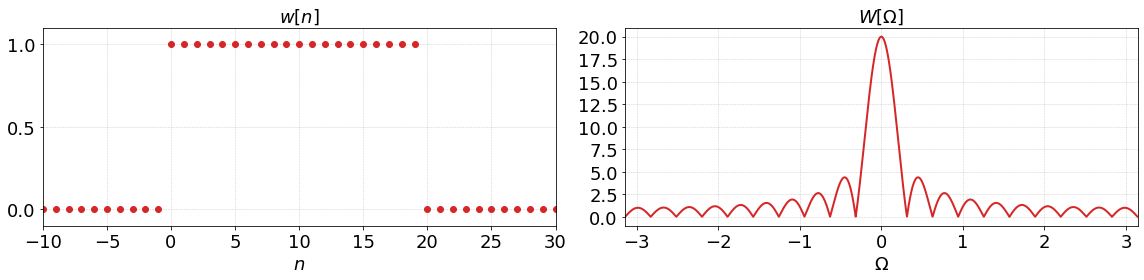

In [23]:
n = np.arange(-2 * Fs, int(10 * Fs), 1)
N = 20
wN = (n >= 0) * (n < N)
freqN = fft.fftfreq(Ndtft) * 2 * np.pi
WN = np.fft.fft(wN, Ndtft)
InxN = fftfreqinx(Ndtft)

fig = figure(figsize=(16, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(n, wN, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 5, 5), fontsize=18)
yticks(np.arange(-1, 1 + 0.5, 0.5), fontsize=18);
ax1.set_xlim(-10, 30)
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$w[n]$", fontsize=18)

ax2 = fig.add_subplot(1, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(freqN[InxN], np.abs(WN[InxN]), color="tab:red", lw=2)
ax2.set_xlim(-np.pi, np.pi)
xticks(fontsize=18)
yticks(fontsize=18);
ax2.set_xlabel("$\Omega$", fontsize=18)
ax2.set_title("$W[\Omega]$", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-rectwindow.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-rectwindow.png", format="png", dpi=300);

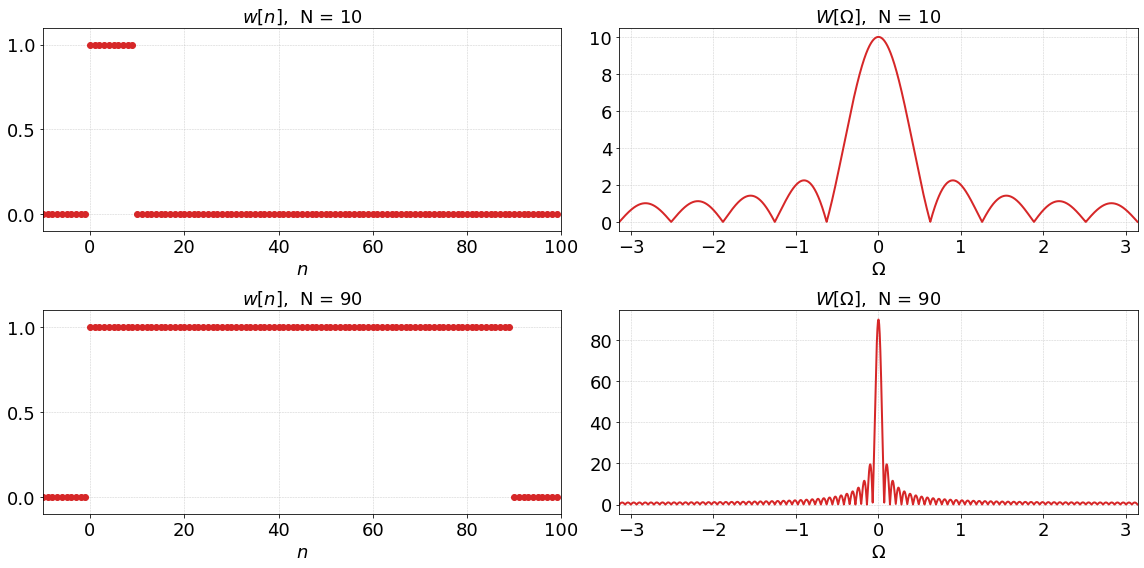

In [36]:
n = np.arange(-2 * Fs, int(10 * Fs), 1)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
N = 10
wN = (n >= 0) * (n < N)
freqN = fft.fftfreq(Ndtft) * 2 * np.pi
WN = np.fft.fft(wN, Ndtft)
InxN = fftfreqinx(Ndtft)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(n, wN, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 20, 20), fontsize=18)
yticks(np.arange(-1, 1 + 0.5, 0.5), fontsize=18);
ax1.set_xlim(-10, 100)
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$w[n]$" + f",  N = {N}", fontsize=18)

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(freqN[InxN], np.abs(WN[InxN]), color="tab:red", lw=2)
ax2.set_xlim(-np.pi, np.pi)
xticks(fontsize=18)
yticks(fontsize=18);
ax2.set_xlabel("$\Omega$", fontsize=18)
ax2.set_title("$W[\Omega]$" + f",  N = {N}", fontsize=18)

ax3 = fig.add_subplot(2, 2, 3)
N = 90
wN = (n >= 0) * (n < N)
freqN = fft.fftfreq(Ndtft) * 2 * np.pi
WN = np.fft.fft(wN, Ndtft)
InxN = fftfreqinx(Ndtft)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
ax3.plot(n, wN, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 20, 20), fontsize=18)
yticks(np.arange(-1, 1 + 0.5, 0.5), fontsize=18);
ax3.set_xlim(-10, 100)
ax3.set_ylim(-0.1, 1.1)
ax3.set_xlabel("$n$", fontsize=18)
ax3.set_title("$w[n]$" + f",  N = {N}", fontsize=18)

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
ax4.plot(freqN[InxN], np.abs(WN[InxN]), color="tab:red", lw=2)
ax4.set_xlim(-np.pi, np.pi)
xticks(fontsize=18)
yticks(fontsize=18);
ax4.set_xlabel("$\Omega$", fontsize=18)
ax4.set_title("$W[\Omega]$" + f",  N = {N}", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-rectwindows.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-rectwindows.png", format="png", dpi=300);

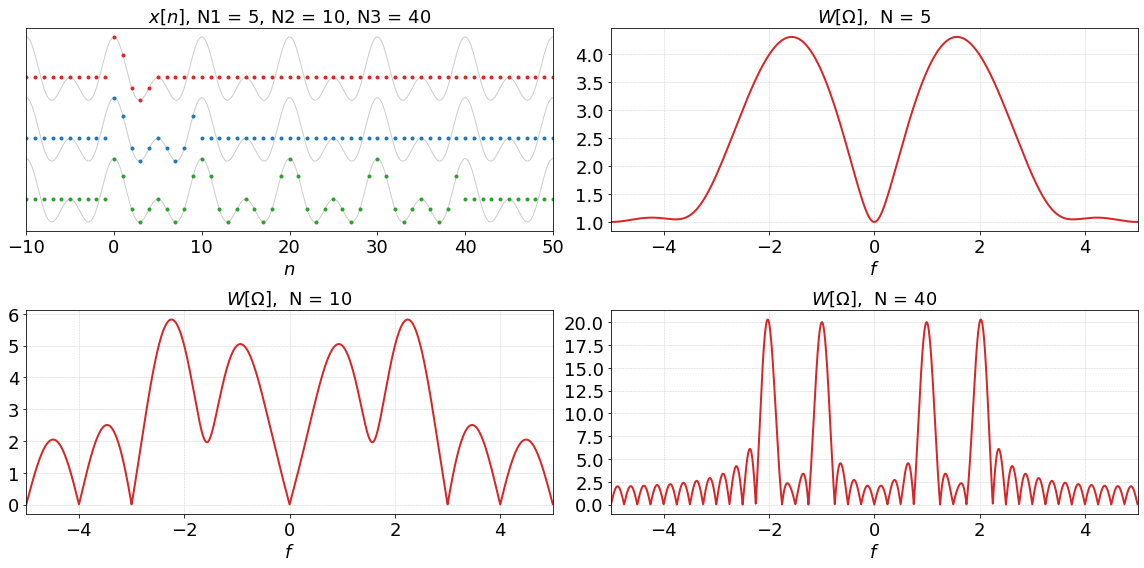

In [70]:
t = np.arange(-2, 20, 0.001)
f1, f2 = 1, 2
A1, A2 = 1, 1
xt = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)
Fs = 10.0
n = np.arange(-2 * Fs, int(20 * Fs), 1)
xn = A1 * np.cos(2 * np.pi * f1 * n * (1 / Fs)) + A2 * np.cos(2 * np.pi * f2 * n * (1 / Fs))

N1, N2, N3 = 5, 10, 40
wN1 = (n >= 0) * (n < N1)
wN2 = (n >= 0) * (n < N2)
wN3 = (n >= 0) * (n < N3)
xN1 = xn * wN1
xN2 = xn * wN2
xN3 = xn * wN3
Ndtft = 4096
freqN = fft.fftfreq(Ndtft) * Fs
XN1 = np.fft.fft(xN1, Ndtft)
XN2 = np.fft.fft(xN2, Ndtft)
XN3 = np.fft.fft(xN3, Ndtft)
InxN = fftfreqinx(Ndtft)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
# ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(t * Fs, xt, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN1, ".", color="tab:red")
ax1.plot(t * Fs, xt - 3, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN2 - 3, ".", color="tab:blue")
ax1.plot(t * Fs, xt - 6, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN3 - 6, ".", color="tab:green")
xticks(np.arange(n[0], n[-1] + 10, 10), fontsize=18)
yticks([],fontsize=18);
ax1.set_xlim(-10, 50)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$" + f", N1 = {N1}, N2 = {N2}, N3 = {N3}", fontsize=18)

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(freqN[InxN], np.abs(XN1[InxN]), color="tab:red", lw=2)
ax2.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax2.set_xlabel("$f$", fontsize=18)
ax2.set_title("$W[\Omega]$" + f",  N = {N1}", fontsize=18)

ax3 = fig.add_subplot(2, 2, 3)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
ax3.plot(freqN[InxN], np.abs(XN2[InxN]), color="tab:red", lw=2)
ax3.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax3.set_xlabel("$f$", fontsize=18)
ax3.set_title("$W[\Omega]$" + f",  N = {N2}", fontsize=18)

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
ax4.plot(freqN[InxN], np.abs(XN3[InxN]), color="tab:red", lw=2)
ax4.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax4.set_xlabel("$f$", fontsize=18)
ax4.set_title("$W[\Omega]$" + f",  N = {N3}", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-resolve1.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-resolve1.png", format="png", dpi=300);

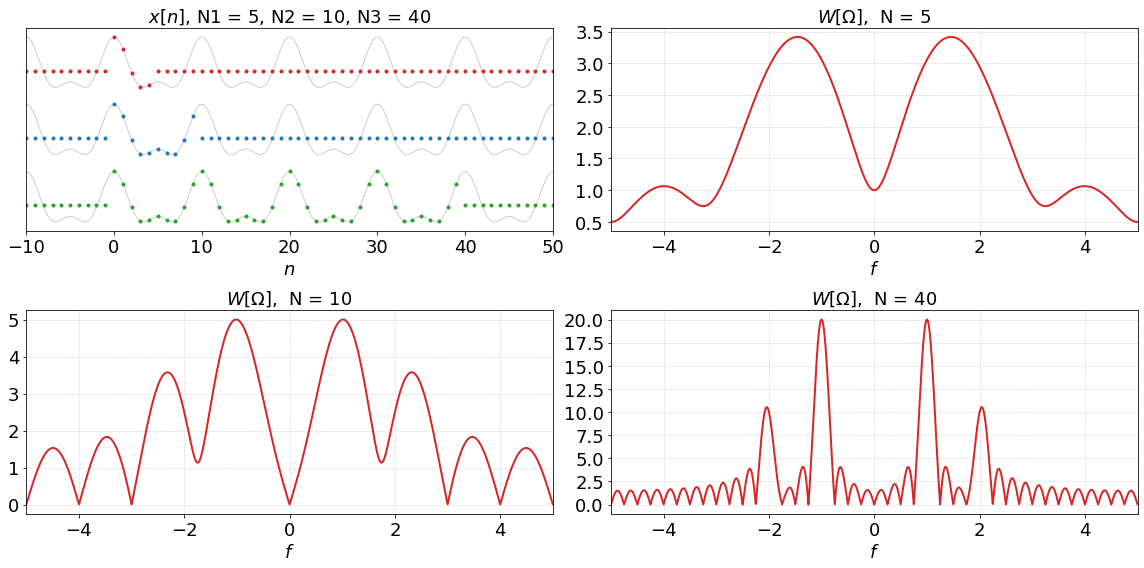

In [71]:
t = np.arange(-2, 20, 0.001)
f1, f2 = 1, 2
A1, A2 = 1, 0.5
xt = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)
Fs = 10.0
n = np.arange(-2 * Fs, int(20 * Fs), 1)
xn = A1 * np.cos(2 * np.pi * f1 * n * (1 / Fs)) + A2 * np.cos(2 * np.pi * f2 * n * (1 / Fs))

N1, N2, N3 = 5, 10, 40
wN1 = (n >= 0) * (n < N1)
wN2 = (n >= 0) * (n < N2)
wN3 = (n >= 0) * (n < N3)
xN1 = xn * wN1
xN2 = xn * wN2
xN3 = xn * wN3
Ndtft = 4096
freqN = fft.fftfreq(Ndtft) * Fs
XN1 = np.fft.fft(xN1, Ndtft)
XN2 = np.fft.fft(xN2, Ndtft)
XN3 = np.fft.fft(xN3, Ndtft)
InxN = fftfreqinx(Ndtft)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
# ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(t * Fs, xt, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN1, ".", color="tab:red")
ax1.plot(t * Fs, xt - 3, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN2 - 3, ".", color="tab:blue")
ax1.plot(t * Fs, xt - 6, color="black", alpha=0.2, lw=1)
ax1.plot(n, xN3 - 6, ".", color="tab:green")
xticks(np.arange(n[0], n[-1] + 10, 10), fontsize=18)
yticks([],fontsize=18);
ax1.set_xlim(-10, 50)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$" + f", N1 = {N1}, N2 = {N2}, N3 = {N3}", fontsize=18)

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(freqN[InxN], np.abs(XN1[InxN]), color="tab:red", lw=2)
ax2.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax2.set_xlabel("$f$", fontsize=18)
ax2.set_title("$W[\Omega]$" + f",  N = {N1}", fontsize=18)

ax3 = fig.add_subplot(2, 2, 3)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
ax3.plot(freqN[InxN], np.abs(XN2[InxN]), color="tab:red", lw=2)
ax3.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax3.set_xlabel("$f$", fontsize=18)
ax3.set_title("$W[\Omega]$" + f",  N = {N2}", fontsize=18)

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
ax4.plot(freqN[InxN], np.abs(XN3[InxN]), color="tab:red", lw=2)
ax4.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax4.set_xlabel("$f$", fontsize=18)
ax4.set_title("$W[\Omega]$" + f",  N = {N3}", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-resolve2.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-resolve2.png", format="png", dpi=300);

1001


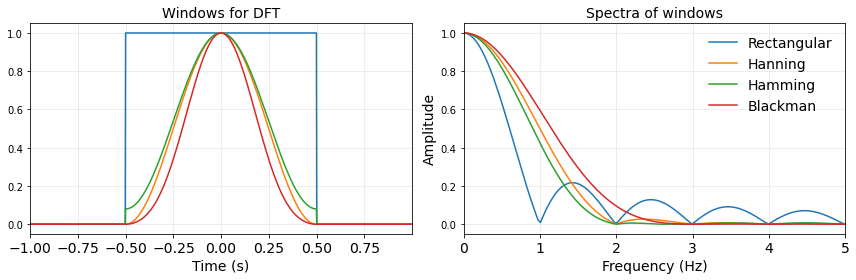

In [75]:
Nw = 501
N = 1001
Fs = 500.0
Ts = 1 / Fs
t = np.arange(0, N, 1) * Ts - 0.5 * N * Ts
print(len(t))
_flim = 5

# Window names
_wnames = ['Rectangular', 'Hanning', 'Hamming', 'Blackman']

# Time windows and their spectra
_wt = [np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)]
_wf = []

# Time windows
# Rectangular window
_wt[0][N//2 - Nw//2:N//2 + Nw//2 + 1] = 1.0
# Hanning window
_wt[1][N//2 - Nw//2:N//2 + Nw//2 + 1] = np.hanning(Nw)
# Hanning window
_wt[2][N//2 - Nw//2:N//2 + Nw//2 + 1] = np.hamming(Nw)
# Blackman
_wt[3][N//2 - Nw//2:N//2 + Nw//2 + 1] = np.blackman(Nw)

fig = figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
for i in range(len(_wt)):
    ax1.plot(t, _wt[i], label=_wnames[i])
ax1.set_xlim(t[0], t[-1])
ax1.set_xlabel('Time (s)', fontsize=14)
xticks(fontsize=14)
# legend(loc=2, fontsize=14, frameon=False)
ax1.set_title("Windows for DFT", fontsize=14)

# Fourier spectra
ax2 = fig.add_subplot(122)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
_N = 16 * 1024
freq = Fs * np.fft.fftfreq(_N)
for i in range(len(_wt)):
    _wf = np.fft.fft(_wt[i], _N)
    _wf = _wf / np.abs(_wf[0])
    ax2.plot(freq[:_N//2], np.abs(_wf)[:_N//2], label=_wnames[i])
    ax2.set_xlim(0, _flim)
ax2.set_xlabel('Frequency (Hz)', fontsize=14)
ax2.set_ylabel('Amplitude', fontsize=14)
xticks(fontsize=14)
ax2.set_title("Spectra of windows", fontsize=14)
legend(loc=1, fontsize=14, frameon=False)
plt.tight_layout()

fig.savefig(f"{outdir}/dft-windows.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-windows.png", format="png", dpi=300);

array([ 0.12      ,  0.52030377, -0.0954915 , -0.38530377, -0.05236068])

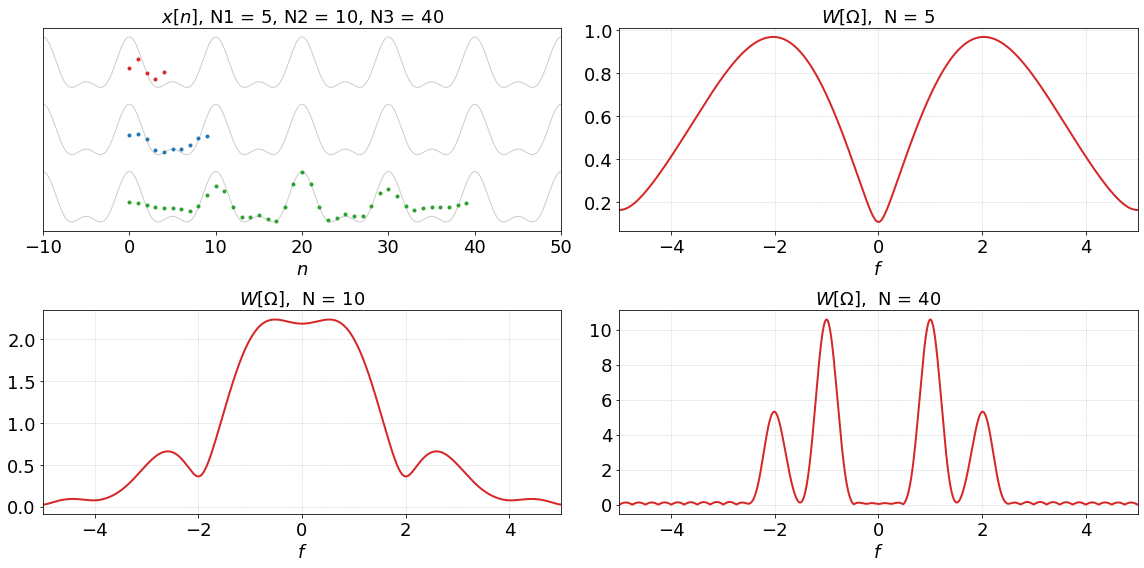

In [86]:
t = np.arange(-2, 20, 0.001)
f1, f2 = 1, 2
A1, A2 = 1, 0.5
xt = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)
Fs = 10.0
n = np.arange(-2 * Fs, int(20 * Fs), 1)
xn = A1 * np.cos(2 * np.pi * f1 * n * (1 / Fs)) + A2 * np.cos(2 * np.pi * f2 * n * (1 / Fs))

N1, N2, N3 = 5, 10, 40
xN1 = xn[(n >= 0) * (n < N1) == 1] * np.hamming(N1)
xN2 = xn[(n >= 0) * (n < N2) == 1] * np.hamming(N2)
xN3 = xn[(n >= 0) * (n < N3) == 1] * np.hamming(N3)
Ndtft = 4096
freqN = fft.fftfreq(Ndtft) * Fs
XN1 = np.fft.fft(xN1, Ndtft)
XN2 = np.fft.fft(xN2, Ndtft)
XN3 = np.fft.fft(xN3, Ndtft)
InxN = fftfreqinx(Ndtft)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 2, 1)
# ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(t * Fs, xt, color="black", alpha=0.2, lw=1)
ax1.plot(np.arange(0, N1), xN1[:N1], ".", color="tab:red")
ax1.plot(t * Fs, xt - 3, color="black", alpha=0.2, lw=1)
ax1.plot(np.arange(0, N2), xN2 - 3, ".", color="tab:blue")
ax1.plot(t * Fs, xt - 6, color="black", alpha=0.2, lw=1)
ax1.plot(np.arange(0, N3), xN3 - 6, ".", color="tab:green")
xticks(np.arange(n[0], n[-1] + 10, 10), fontsize=18)
yticks([],fontsize=18);
ax1.set_xlim(-10, 50)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$" + f", N1 = {N1}, N2 = {N2}, N3 = {N3}", fontsize=18)

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(freqN[InxN], np.abs(XN1[InxN]), color="tab:red", lw=2)
ax2.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax2.set_xlabel("$f$", fontsize=18)
ax2.set_title("$W[\Omega]$" + f",  N = {N1}", fontsize=18)

ax3 = fig.add_subplot(2, 2, 3)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
ax3.plot(freqN[InxN], np.abs(XN2[InxN]), color="tab:red", lw=2)
ax3.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax3.set_xlabel("$f$", fontsize=18)
ax3.set_title("$W[\Omega]$" + f",  N = {N2}", fontsize=18)

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
ax4.plot(freqN[InxN], np.abs(XN3[InxN]), color="tab:red", lw=2)
ax4.set_xlim(-Fs / 2, Fs / 2)
xticks(fontsize=18)
yticks(fontsize=18);
ax4.set_xlabel("$f$", fontsize=18)
ax4.set_title("$W[\Omega]$" + f",  N = {N3}", fontsize=18)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-resolve2-hamming.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-resolve2-hamming.png", format="png", dpi=300);

In [101]:
xN1

array([ 0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [103]:
XN1

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

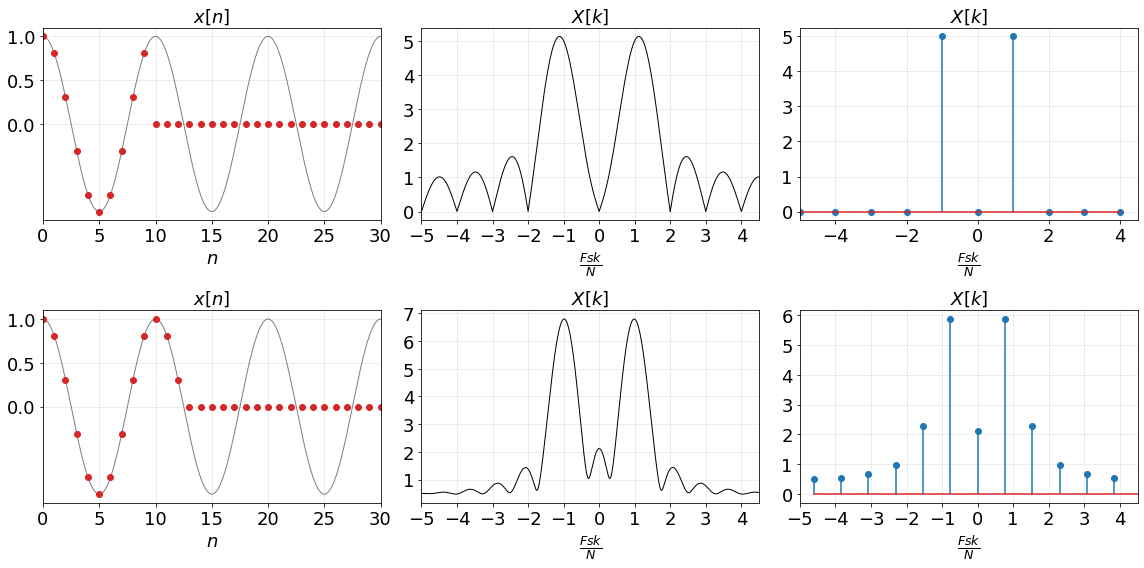

In [144]:
t = np.arange(0, 10, 0.001)
f0 = 1
xt = np.cos(2 * np.pi * f0 * t)
Fs = 10.0
n = np.arange(0 * Fs, int(10 * Fs), 1)
xn = np.cos(2 * np.pi * f0 * n * (1 / Fs))

# N1
N1 = 10
wN1 = (n >= 0) * (n < N1)
xN1 = xn * wN1
Ndtft = 4096
_freqN1 = fft.fftfreq(Ndtft) * Fs
_XN1 = np.fft.fft(xN1, Ndtft)
_InxN1 = fftfreqinx(Ndtft)
freqN1 = fft.fftfreq(N1) * Fs
XN1 = np.fft.fft(xN1, N1)
InxN1 = fftfreqinx(N1)

# N2
N2 = 13
wN2 = (n >= 0) * (n < N2)
xN2 = xn * wN2
Ndtft = 4096
_freqN2 = fft.fftfreq(Ndtft) * Fs
_XN2 = np.fft.fft(xN2, Ndtft)
_InxN2 = fftfreqinx(Ndtft)
freqN2 = fft.fftfreq(N2) * Fs
XN2 = np.fft.fft(xN2, N2)
InxN2 = fftfreqinx(N2)

fig = figure(figsize=(16, 8))
ax1 = fig.add_subplot(2, 3, 1)
ax1.grid(color='0.8', linestyle='--', linewidth=0.5);
ax1.plot(t * Fs, xt, color="black", alpha=0.5, lw=1)
ax1.plot(n, xN1, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 5, 5), fontsize=18)
yticks(np.arange(0, 1 + 0.5, 0.5), fontsize=18);
ax1.set_xlim(0, 30)
ax1.set_xlabel("$n$", fontsize=18)
ax1.set_title("$x[n]$", fontsize=18)

ax2 = fig.add_subplot(2, 3, 2)
ax2.grid(color='0.8', linestyle='--', linewidth=0.5);
ax2.plot(_freqN1[_InxN1], np.abs(_XN1[_InxN1]), lw=1, color="black")
ax2.set_xlabel(r"$\frac{Fs k}{N}$", fontsize=18)
ax2.set_title("$X[k]$", fontsize=18)
xticks(np.arange(-Fs/2, Fs/2, 1), fontsize=18)
ax2.set_xlim(-Fs/2, (Fs-1)/2)
xticks(np.arange(-Fs/2, Fs/2, 1), fontsize=18)
yticks(fontsize=18)

ax3 = fig.add_subplot(2, 3, 3)
ax3.grid(color='0.8', linestyle='--', linewidth=0.5);
ax3.stem(freqN1[InxN1], np.abs(XN1[InxN1]))
ax3.set_xlabel(r"$\frac{Fs k}{N}$", fontsize=18)
ax3.set_title("$X[k]$", fontsize=18)
ax3.set_xlim(-Fs/2, (Fs-1)/2)
xticks(fontsize=18)
yticks(fontsize=18)

ax4 = fig.add_subplot(2, 3, 4)
ax4.grid(color='0.8', linestyle='--', linewidth=0.5);
ax4.plot(t * Fs, xt, color="black", alpha=0.5, lw=1)
ax4.plot(n, xN2, "o", color="tab:red")
xticks(np.arange(n[0], n[-1] + 5, 5), fontsize=18)
yticks(np.arange(0, 1 + 0.5, 0.5), fontsize=18);
ax4.set_xlim(0, 30)
ax4.set_xlabel("$n$", fontsize=18)
ax4.set_title("$x[n]$", fontsize=18)

ax5 = fig.add_subplot(2, 3, 5)
ax5.grid(color='0.8', linestyle='--', linewidth=0.5);
ax5.plot(_freqN2[_InxN2], np.abs(_XN2[_InxN2]), lw=1, color="black")
ax5.set_xlabel(r"$\frac{Fs k}{N}$", fontsize=18)
ax5.set_title("$X[k]$", fontsize=18)
ax5.set_xlim(-Fs/2, (Fs-1)/2)
xticks(np.arange(-Fs/2, Fs/2, 1), fontsize=18)
yticks(fontsize=18)

ax6 = fig.add_subplot(2, 3, 6)
ax6.grid(color='0.8', linestyle='--', linewidth=0.5);
ax6.stem(freqN2[InxN2], np.abs(XN2[InxN2]))
ax6.set_xlabel(r"$\frac{Fs k}{N}$", fontsize=18)
ax6.set_title("$X[k]$", fontsize=18)
xticks(np.arange(-Fs/2, Fs/2, 1), fontsize=18)
yticks(fontsize=18)
ax6.set_xlim(-Fs/2, (Fs-1)/2)

plt.tight_layout()

fig.savefig(f"{outdir}/dft-windoweffect.svg", format="svg", dpi=300);
fig.savefig(f"{outdir}/dft-windoweffect.png", format="png", dpi=300);